Data Exploration:
Before diving straight into analysis or manipulation, the understanding of the basic structure, contents and characteristics of the dataset "Reported.csv" is crucial.

This section imports necessary libraries and loads the dataset 'reported.csv' into a pandas DataFrame. 'pandas' is used for data manipulation and analysis, 'numpy' for numerical operations, 'matplotlib.pyplot' for data visualization and the 'sklearn' library functions are imported for later steps in modeling and evaluation.  

Step 1: Data Loading. Step 2: Preliminary Data Exploration. 

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('reported.csv')

# Display the first few rows of the dataframe to understand what the data looks like
print("\nData efter head:")
print(data.head())

# Checking the dataset's overall information, including the number of entries, the type of each column, and the presence of null values
print("\nData efter info:")
print(data.info())

# Generating descriptive statistics summary of the numerical columns. This helps in understanding the distribution of numerical data
print("\nData efter describe:")
print(data.describe())

# Check for missing values
print("\nData efter missing values:")
print(data.isnull().sum())



Data efter head:
   Year  crimes.total  crimes.penal.code  crimes.person  murder  assault  \
0  1950          2784               2306            120       1      105   
1  1951          3284               2754            125       1      109   
2  1952          3160               2608            119       1      104   
3  1953          2909               2689            119       1      105   
4  1954          3028               2791            126       1      107   

   sexual.offenses  rape  stealing.general  burglary  ...  vehicle.theft  \
0               40     5              1578       295  ...            NaN   
1               45     6              1899       342  ...            NaN   
2               39     4              1846       372  ...            NaN   
3               45     5              1929       361  ...            NaN   
4               41     5              1981       393  ...            NaN   

   out.of.vehicle.theft  shop.theft  robbery  fraud  criminal.damage

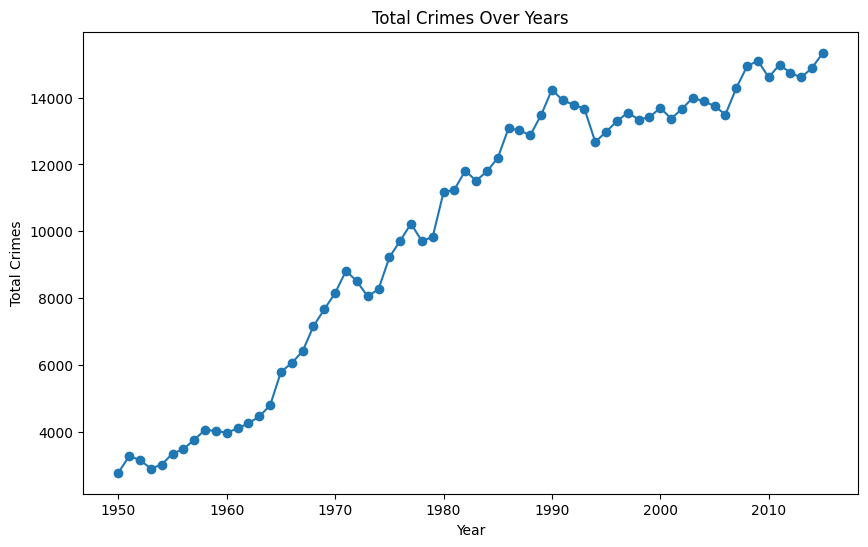

In [10]:
#Data Exploration

# Visualizing total crimes over the years
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['crimes.total'], marker='o')
plt.title('Total Crimes Over Years')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.show()


Initial exploration helps to understand the dataset's structure, types of data it contains and basic statistics. 

data.head() displays the first few rows, giving a glimpse into the columns and types of data.

data.describe() provides summary statistics for numerical columns. aiding in early detection of outliers and understanding distribution.

data.isnull().sum() checks for missing values in each column.

.info() provides a concise summary including non-null counts and data types, crucial for identifying missing data and column data typesn.

Data Cleaning:
Cleaning the data is essential for accurate analysis. This involves handling missing values, correcting data types, and removing outliers. 

Step 3: Data Cleaning Missing values can skew analysis and modeling. Filling these with the median (a robust measure of central tencency) ensures the dataset is complete without significantly altering its distribution.

In [5]:
# Fill missing values with the median of each column
data.fillna(data.median(), inplace=True)
data

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,419.0,1210.0,606.0,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,419.0,1210.0,606.0,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,419.0,1210.0,606.0,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,419.0,1210.0,606.0,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,419.0,1210.0,606.0,4,236,101,237,0.0,103,7213000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,14988,12267,1005,2,947,181,69,5783,995,...,213.0,706.0,663.0,103,1220,1774,2721,946.0,314,9449000
62,2012,14734,12148,974,2,914,178,66,5613,922,...,169.0,655.0,635.0,97,1356,1600,2586,994.0,286,9519000
63,2013,14603,12072,896,3,837,184,63,5552,888,...,159.0,543.0,509.0,87,1545,1470,2532,1002.0,279,9644000
64,2014,14890,12305,923,3,859,210,69,5572,913,...,147.0,542.0,505.0,86,1610,1559,2585,983.0,271,9747000


step 4: Feature engineering: Creating new features can provide additional insights or improve model performance. 'crimes_per_capita' normalizes total crimes by population size, allowing for more meaningful year over year comparisons irrespective of population growth. 

In [6]:
# Calculate crimes per capita (per 100,000 people)
data['crimes_per_capita'] = (data['crimes.total'] / data['population']) * 100000
data

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population,crimes_per_capita
0,1950,2784,2306,120,1,105,40,5,1578,295,...,1210.0,606.0,3,209,72,477,0.0,49,7014000,39.692044
1,1951,3284,2754,125,1,109,45,6,1899,342,...,1210.0,606.0,3,310,73,530,0.0,66,7073000,46.430086
2,1952,3160,2608,119,1,104,39,4,1846,372,...,1210.0,606.0,3,217,82,553,0.0,78,7125000,44.350877
3,1953,2909,2689,119,1,105,45,5,1929,361,...,1210.0,606.0,4,209,88,220,0.0,91,7171000,40.566169
4,1954,3028,2791,126,1,107,41,5,1981,393,...,1210.0,606.0,4,236,101,237,0.0,103,7213000,41.979759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,14988,12267,1005,2,947,181,69,5783,995,...,706.0,663.0,103,1220,1774,2721,946.0,314,9449000,158.619960
62,2012,14734,12148,974,2,914,178,66,5613,922,...,655.0,635.0,97,1356,1600,2586,994.0,286,9519000,154.785167
63,2013,14603,12072,896,3,837,184,63,5552,888,...,543.0,509.0,87,1545,1470,2532,1002.0,279,9644000,151.420572
64,2014,14890,12305,923,3,859,210,69,5572,913,...,542.0,505.0,86,1610,1559,2585,983.0,271,9747000,152.764953


Step 5: Exploratory Data Analysis (EDA)
Visualizing data trends helps identify patterns or anomalies. This code plots total crimes, population (scaled down for comparison purposes), and crimes per capita over time, illustrating how crime rates have changed relative to population growth.

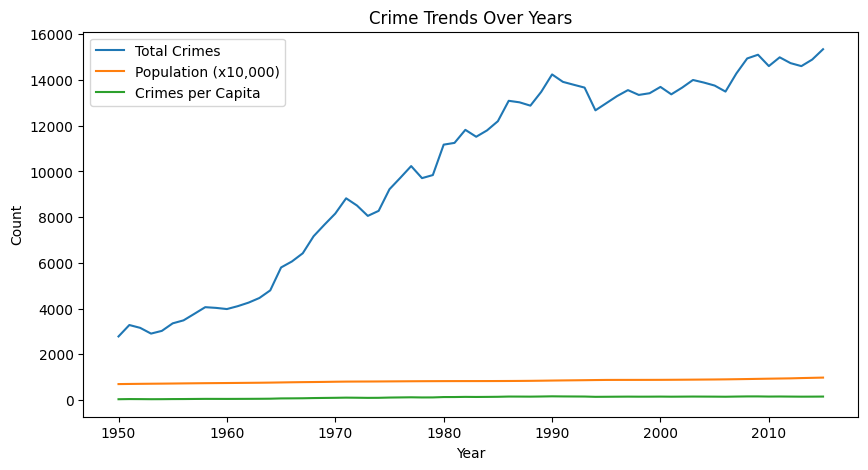

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['crimes.total'], label='Total Crimes')
plt.plot(data['Year'], data['population']/10000, label='Population (x10,000)')
plt.plot(data['Year'], data['crimes_per_capita'], label='Crimes per Capita')
plt.legend()
plt.title('Crime Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


Step 6: Preparing data for modeling: Before modeling, data is split into features (X) and the target variable (y). Here, we aim to predict crimes_per_capita based on Year. The dataset is then divided into training and testing sets to evaluate model performance on unseen data.

In [8]:
# Assuming 'Year' is used as a single feature for simplicity
X = data[['Year']]
y = data['crimes_per_capita']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 7: Modeling - Linear Regression. A Linear Regression model is used to predict crimes_per_capita from Year. The model is trained on the training set and predictions are made on the testing set. Model performance is evaluated using Mean Squared Error (MSE) and R-squared (R²) metrics. MSE measures the average squared difference between actual and predicted values, providing insight into model accuracy, while R² represents the proportion of variance in the dependent variable that is predictable from the independent variable, indicating the model's goodness of fit.

In [9]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 404.6241225034672
R^2 Score: 0.8222507274033208


#Here's how to modify the data cleaning process to replace missing values with 0 for applicable numerical columns:

# Define numerical and categorical columns again
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Now, replace missing values in numerical columns with 0
df[numerical_cols] = df[numerical_cols].fillna(0)

# For categorical columns, replacing missing values with a placeholder 'Unknown'
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Display updated information to confirm changes
print(df.info())


This code replaces missing values in numerical columns with 0 and fills missing values in categorical columns with 'Unknown'. No data is removed, including outliers, under the assumption that all data points are potentially valuable for the analysis.

Replacing missing data with 0, or any other constant value, can be an approach in certain contexts, especially where it makes logical sense to interpret missing or non-applicable values as "zero". This strategy is sometimes used in features where a missing value can logically be replaced with 0 without distorting the data's integrity, for example, in columns representing counts, quantities, or presence/absence indicators.

However, this approach requires careful consideration:

Numerical Data: For numerical columns, replacing missing values with 0 might be suitable if 0 does not introduce bias or misinterpretation. For instance, if you have a column for "number of times participated in an event," replacing missing values with 0 could be reasonable, assuming missing values imply non-participation. However, for measurements where 0 could be misleading (like age, price, or temperature), other strategies like interpolation or using the mean/median might be more appropriate.

Categorical Data: For categorical columns, replacing missing values with 0 is generally not applicable because these columns typically represent types or categories, where numerical operations (like averaging) or the concept of "zero" don't make sense. In such cases, using the mode (most frequent category) or a placeholder category like 'Unknown' is more appropricolumns:

Important Consideration:

Data Integrity: Always ensure that the method used for handling missing data aligns with the context of your data and the goals of your analysis. Replacing missing values with 0 is straightforward but may not always be the best approach, especially if it risks introducing bias or inaccuracies into your analysis.

Outliers: Deciding not to remove outliers by default is valid, especially for exploratory analysis where understanding the full range of your data is important. Outliers should be carefully examined; they can sometimes indicate data entry errors, unusual but valid data points, or phenomena worthy of further investigation.

# Identifying columns with missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

# Dropping columns with more than 50% missing values
cols_to_drop = missing_values[missing_values > len(df)/2].index
df.drop(cols_to_drop, axis=1, inplace=True)

# For numerical columns, interpolate missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.interpolate())

# For categorical columns, replace missing values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Example of removing outliers for a hypothetical 'age' column
# This step requires specific knowledge about what constitutes an outlier in your context
# df = df[(df['age'] >= 10) & (df['age'] <= 100)]  # Hypothetical example

print(df.info())  # Re-check t steps were effective


#Interpolating numerical columns helps maintain data integrity without dropping rows.

#Filling categorical missing values with the mode preserves the most common category steps were effective

Data Visualization:
Visualizing Data can reveal patterns, outliers and relationships that are not apparent in raw data. 

In [6]:
# Visualizing the distribution of a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(df['numerical_column'], kde=True)
plt.title('Distribution of Numerical Column')
plt.show()

# Visualizing the distribution of a categorical column
plt.figure(figsize=(10, 6))
sns.countplot(y=df['categorical_column'])
plt.title('Distribution of Categorical Column')
plt.show()


KeyError: 'numerical_column'

<Figure size 1000x600 with 0 Axes>

Review of Data Cleaning Steps Accomplished:
Missing Values: You've successfully identified that there were no columns with missing values after initial checks or the cleaning steps effectively resolved them.

Dropping Columns: No columns were dropped due to over 50% missing values, which implies all your data fields were relatively complete.

Interpolation: You've interpolated missing values for numerical columns, although it turns out there were no missing values to interpolate. This step ensures that, should there have been any gaps in the numerical data, they would have been filled logically based on surrounding data points.

Mode Replacement for Categorical Data: You filled any gaps in categorical data with the most common value (mode) for that column. Given your output, it seems there were no missing values to fill, which indicates your categorical data was also complete.

Outlier Handling: You mentioned an example of removing outliers for an 'age' column. This step is crucial for ensuring your dataset does not include extreme values that could skew your analysis. However, the specific handling of outliers would depend on the context and understanding of each variable in your dataset.

Understanding The Data Structure:

Your dataset contains 66 entries and 21 columns, with a mix of integer (int64) and floating-point (float64) data types.
The columns cover various crime statistics, including total crimes, specific offenses (such as assault, sexual offenses, and narcotics), and demographic data like population.

Descriptive Statistics:
Now that the data is clean, it's valuable to explore it though descriptive statistics to understand the distributions, central tendencies (mean,median) and variability (standard deviation) of the numerical data. 

In [7]:
# Calculating and displaying descriptive statistics for numerical columns
print(df.describe())

              Year  crimes.total  crimes.penal.code  crimes.person     murder  \
count    66.000000     66.000000          66.000000      66.000000  66.000000   
mean   1982.500000  10084.257576        8695.181818     451.287879   1.757576   
std      19.196354   4223.893287        3582.148938     295.041002   0.724529   
min    1950.000000   2784.000000        2306.000000     119.000000   1.000000   
25%    1966.250000   6152.500000        5336.000000     185.250000   1.000000   
50%    1982.500000  11654.000000        9637.000000     370.500000   2.000000   
75%    1998.750000  13663.750000       12002.500000     690.500000   2.000000   
max    2015.000000  15342.000000       12803.000000    1005.000000   4.000000   

          assault  sexual.offenses       rape  stealing.general     burglary  \
count   66.000000        66.000000  66.000000         66.000000    66.000000   
mean   423.106061        75.318182  20.045455       5580.545455  1240.681818   
std    281.839023        48.13

Data Visualization:
Visualizing the data can help uncover patterns, trends and outliers. Given the nature of the dataset "Reported.csv". Focusing on crime trends over time or the distribution of specifiv types of crimes could be insightful. 

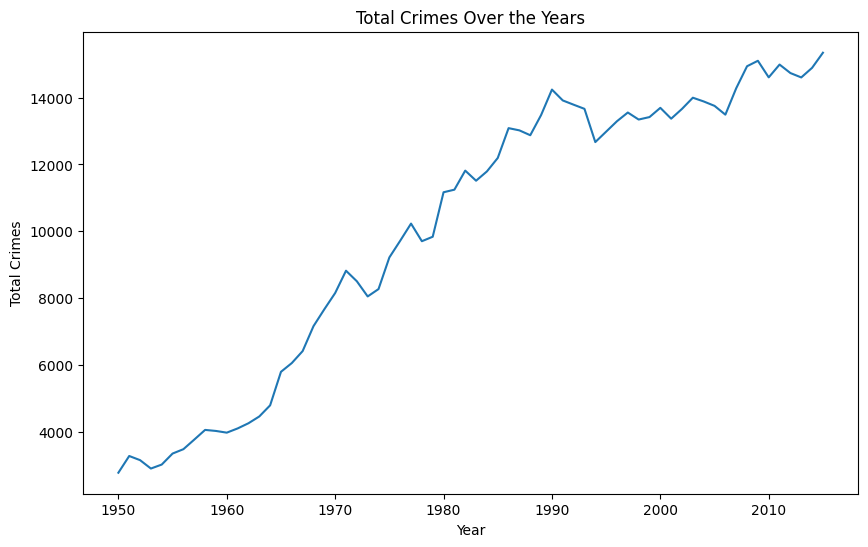

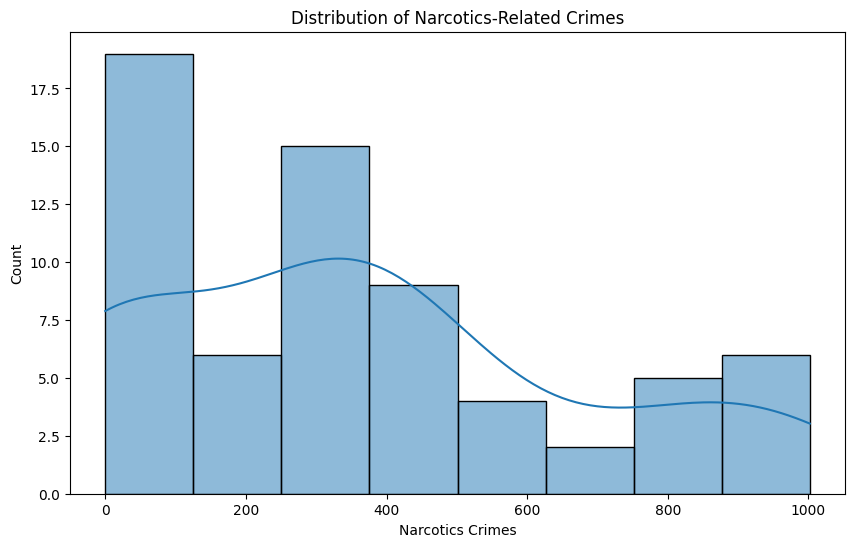

In [8]:
# Example: Visualizing total crimes over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Year", y="crimes.total")
plt.title("Total Crimes Over the Years")
plt.ylabel("Total Crimes")
plt.xlabel("Year")
plt.show()

# Example: Distribution of a specific crime
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="narcotics", kde=True)
plt.title("Distribution of Narcotics-Related Crimes")
plt.xlabel("Narcotics Crimes")
plt.show()


Feature Engineering:
Consider creating new features that could be insightful for the analysis. Could be caculate crime rates per capita. 

In [10]:
# Example: Calculating crimes per capita
df['crimes_per_capita'] = df['crimes.total'] / df['population']
df

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population,crimes_per_capita
0,1950,2784,2306,120,1,105,40,5,1578,295,...,0.0,0.0,3,209,72,477,0.0,49,7014000,0.000397
1,1951,3284,2754,125,1,109,45,6,1899,342,...,0.0,0.0,3,310,73,530,0.0,66,7073000,0.000464
2,1952,3160,2608,119,1,104,39,4,1846,372,...,0.0,0.0,3,217,82,553,0.0,78,7125000,0.000444
3,1953,2909,2689,119,1,105,45,5,1929,361,...,0.0,0.0,4,209,88,220,0.0,91,7171000,0.000406
4,1954,3028,2791,126,1,107,41,5,1981,393,...,0.0,0.0,4,236,101,237,0.0,103,7213000,0.000420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,14988,12267,1005,2,947,181,69,5783,995,...,706.0,663.0,103,1220,1774,2721,946.0,314,9449000,0.001586
62,2012,14734,12148,974,2,914,178,66,5613,922,...,655.0,635.0,97,1356,1600,2586,994.0,286,9519000,0.001548
63,2013,14603,12072,896,3,837,184,63,5552,888,...,543.0,509.0,87,1545,1470,2532,1002.0,279,9644000,0.001514
64,2014,14890,12305,923,3,859,210,69,5572,913,...,542.0,505.0,86,1610,1559,2585,983.0,271,9747000,0.001528


Correlation Analysis:
Exploring the relationship between different variables can help identify potenrial factors associated with crime rates.

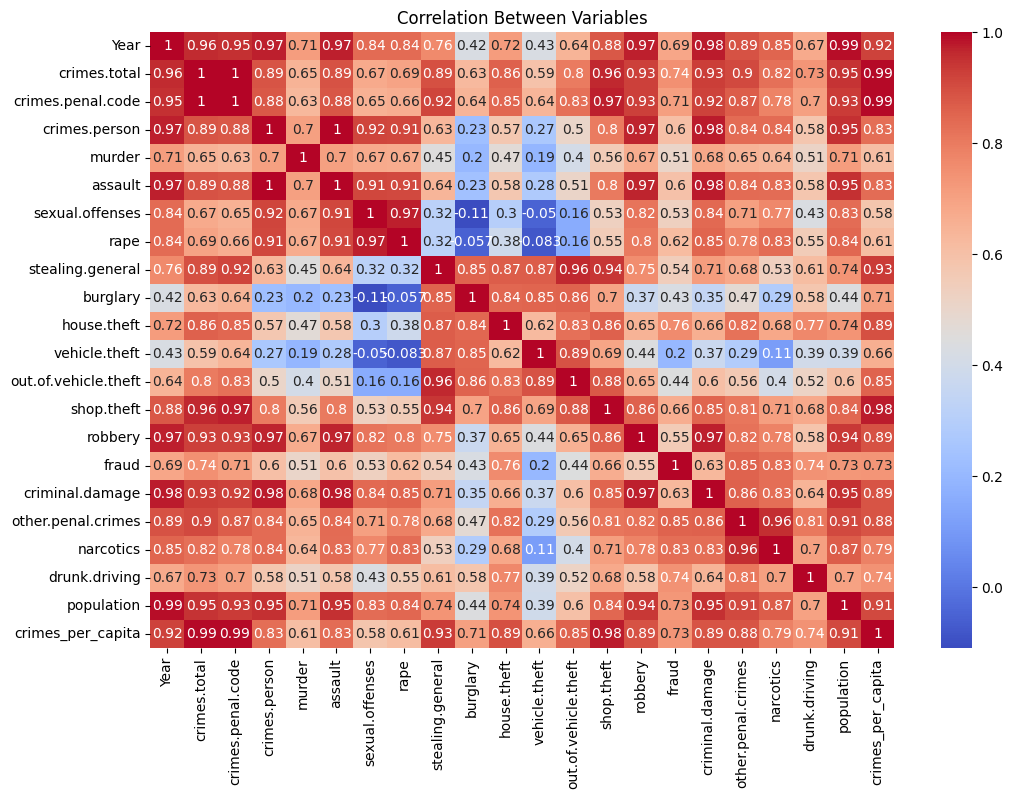

In [11]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Variables")
plt.show()